In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
import warnings
from scipy import stats

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 1
}

plt.rc('axes', unicode_minus=False)
sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **지수분포**

 지수 분포를 하기 전, 포아송 분포에 대해서 다시 한 번 훑을 필요가 있다. 지수 분포는 이산 확률 분포인 포아송 분포로부터 유도 되기 때문이다.


### **포아송 분포**

특정 단위 기간 동안 λ 번 일어나는 사건이 있을 때, 해당 단위 기간 동안 사건이 k번 일어날 확률에 대한 분포가 포아송 분포이다.


포아송 분포는 이항 분포에 근사하는 확률 분포로서, 매 사건들이 독립적이여야 하는 이항 분포와 달리 조금씩의 종속성도 인정해주며, 이항 분포에 비해 계산량도 적어 자주 사용된다.



$X~Pois(\lambda )$


$P(X=k):\frac{e^{-\lambda }\lambda ^k}{k!}$

모수로 λ 를 갖는 포아송 분포는 다음과 같은 예시로 존재한다.




    "30분 동안 길을 걷다 고양이를 3번 만났을 때, 30분 동안 고양이를 k 번 만날 확률"



포아송 분포는 단위 시간 동안 일어날 사건에 대한 분포였다.


그러면 일어날 사건이 아닐, 일어날 기간에 대한 확률 분포는 없을까 ?


그게~ 바로~ 지수분포다



### **지수 분포**



$X~Expo(\lambda )$


지수 분포도 포아송 분포와 같이 모수로서 λ 를 갖는 연속 분포이다.


지수 분포의 확률 밀도 함수를 구하기 전에 누적 확률 분포를 먼저 구해보는 것이, 포아송 분포와의 연관성을 찾기가 쉽다.


앞서 말했던 것 처럼 길고양이 예시로 가져와서 모수를 가져와보자.



    '30분 동안 길을 걷다 고양이를 3번 만났을 때 길을 걷다 5분 안에 고양이를 만날 확률'


30분 동안 고양이를 3번 만났으니 1분이라는 단위 시간 동안 고양이를 만날 확률(λ)은 0.1 이다.




$\lambda =\ 0.1$


길을 걷다 5분안에 고양이를 만날 확률을 A 라고 했을 때


오히려 전체 확률에서 5분 안에 고양이를 만나지 않을 확률을 구하는 것이 더 편할 것이다.


이 때 5분이라는 시간은 고양이를 만날 확률이 0.1인 포아송 분포를 따르는, 1분이라는 단위 시간들의 나열이라고 볼 수 있다.


5분안에 고양이를 만나지 않으려면 1분 때 고양이를 만나지 않고, 2분 때 고양이를 만나지 않고 ... 쭉 가서 5분에도 고양이를 만나지 않으면 된다.


각 단위 시간 별로 고양이를 한 마리도 만나지 않으려면 ?

﻿

﻿

$X$~$Pois(\lambda =0.1)$

$P(X=0)=\frac{e^{-0.1}\lambda ^0}{0!}=e^{-0.1}$\

해당 사건이 5분까지 5번 일어나야 하니 

5분간 고양이를 만나지 않을 확률

$= (e^{-0.1})^5$


$1-(e^{-1})^5\approx 0.39$

약 40% 의 확률로 만날 수 있다.

일반화 해서 써보자

단위 시간 동안 사건이 $\lambda$ 번 일어났을 때 X 이내에 사건이 일어날 확률은

$CDF = \int_0^x f(t)dt = 1 - e^{-\lambda x}$

이렇게 우리는 포아송 분포와 연관 된 지수 분포의 누적 확률 분포에 대해서 구했다.

확률밀도함수는 누적밀도함수를 미분한 값이다.

$PDF = \frac{d}{dx} 1 - e^{-\lambda x}$

$= \lambda e^{-\lambda x} $ 

In [19]:
class Expo:
    
    def __init__(self,lamb):
        
        self.lamb = lamb
        
    def poisson(self):
        '''
        포아송 분포를 따르는 1 단위 시간 내 
        0 번 성공 할 확률 
        '''
        k = 0 
        return (np.exp(-self.lamb) * self.lamb ** k)/math.factorial(k)
    
    def cdf(self,t):
        '''
        단위 시간 내 처음 성공할 때 까지의 기간
        
        전체 확률 - t 번 이하까지 모두 실패 할 확률 = t 번 이상 성공 할 확률 
        
        t 단위 기간 동안 성공하지 않아야 하기 때문에 
        
        포아송분포의 pmf ** t 
        '''
        
        return 1 - self.poisson() **t
    
    def pdf(self,t):
        '''
        Exponential distribution의 CDF 를 t 에 대해 미분하여 구한
        확률밀도함수
        '''
        
        return self.lamb * np.exp(-self.lamb * t)
    
    def sf(self,t):
        '''
        survival fucntion 으로 CDF 가 P(X <= x) 를 계산했다면
        
        sf 는 P(X >= x) 를 계산하기 위해 1 - P(X <= x) 
        
        '''
        return 1 - self.cdf(t) 
        
    
    def memmoryless(self,s,t):
        '''
        단위기간 s 동안 시간이 지난 후  
        t 안에 사건이 일어날 확률
        
        지수분포는 무기억성을 가지고 있기 때문에 
        지나가버린 s 기간 동안에 대한 정보는 도움을 주지 않음 
        
        P(X >= s + t  , X >= s| X >= s) 인데 X>= s+t 와 X >= s 의 교집합은 X >= s+t 
        
        식은 
        
        P(X >= s+t) / P(X >= s) 가 됨
        '''
        
        S = self.sf(s)
        ST = self.sf(s + t)
        
        print('P(X >= s + t) :' , ST)
        print('P(X >= s) :', S)
        print('\n')
        
        T = self.sf(t)
        
        print('P(X >= s + t)|P(X >= s) : ', round(ST / S,8))
        print('P(X >= t) : ', round(T , 8))

In [20]:
expo = Expo(lamb = 0.1)

Text(0.5, 1.0, '1분당 고양이를 만날 확률이 $\\lambda$ 일 때 \n $t$ 분 안에 고양이를 만날 확률\n $X$~$Expo(\\lambda)$')

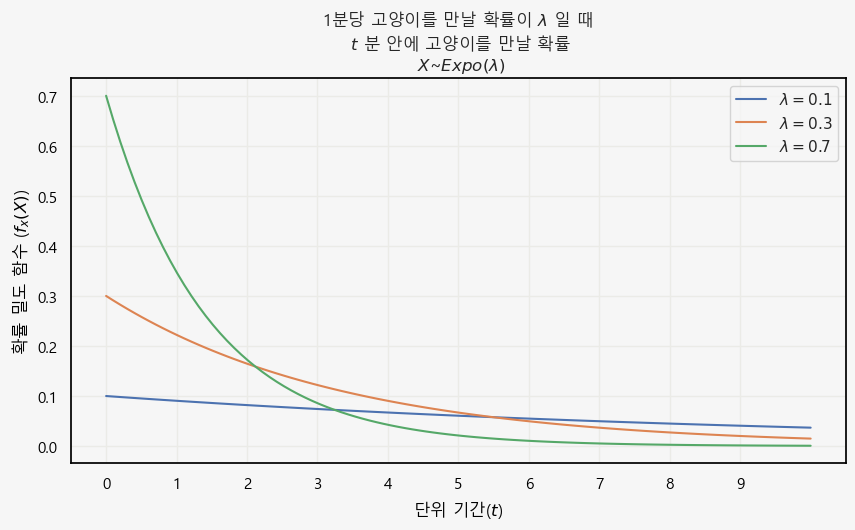

In [47]:
X = np.linspace(0,10,100)

fig,ax = plt.subplots(figsize = (10,5))

for l in [0.1,0.3,0.7]:
    expo = Expo(lamb = l)
    ax.plot(
        X,expo.pdf(X),label = f'$\lambda = {l}$'
    )
ax.legend()
ax.set_xticks(np.arange(0,10));
ax.set_xlabel('단위 기간($t$)')
ax.set_ylabel('확률 밀도 함수 ($f_x(X)$)')
ax.set_title('1분당 고양이를 만날 확률이 $\lambda$ 일 때 \n $t$ 분 안에 고양이를 만날 확률\n $X$~$Expo(\lambda)$')

﻿ 단위 기간 내 일어날 확률이 클 수록 분포가 더 가파르게 나타나는 모습을 볼 수 있다. 단위 기간 내 일어날 확률이 크면, 초반에 일어날 확률이 크니까 말이다.

Text(0.5, 1.0, '1분당 고양이를 만날 확률이 $\\lambda$ 일 때 \n $t$ 분 안에 고양이를 만날 누적 확률\n $X$~$Expo(\\lambda)$')

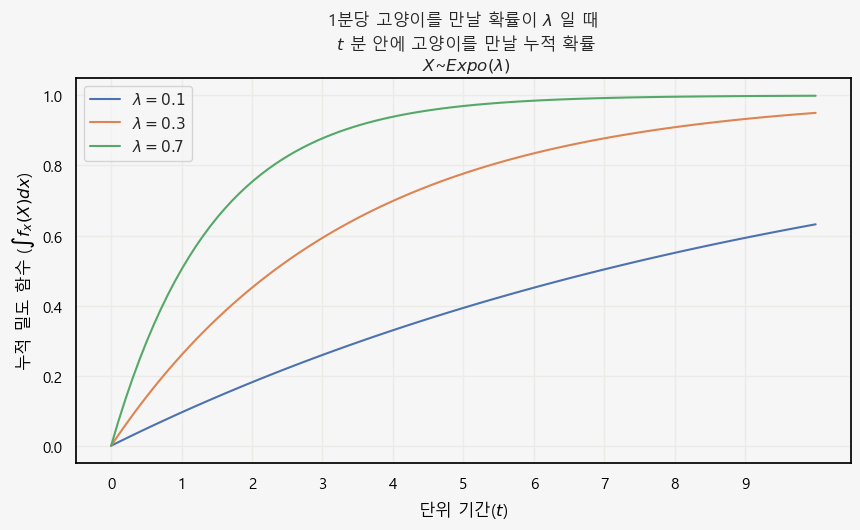

In [52]:
X = np.linspace(0,10,100)

fig,ax = plt.subplots(figsize = (10,5))

for l in [0.1,0.3,0.7]:
    expo = Expo(lamb = l)
    ax.plot(
        X,expo.cdf(X),label = f'$\lambda = {l}$'
    )
ax.legend()
ax.set_xticks(np.arange(0,10));
ax.set_xlabel('단위 기간($t$)')
ax.set_ylabel('누적 밀도 함수 ($\int f_x(X) dx$)')
ax.set_title('1분당 고양이를 만날 확률이 $\lambda$ 일 때 \n $t$ 분 안에 고양이를 만날 누적 확률\n $X$~$Expo(\lambda)$')


누적 확률 분포의 모습도 확률 분포의 모습 처럼 λ가 클 수록 빠르게 cdf 값이 1에 가까워지는 모습을 볼 수 있다.


여태 확률 분포를 구할 때 X 이내에 사건이 발 할 확률을 구해봤는데, 그러면 X 이후에 사건이 발생 할 확률은 어떻게 구할까 ?



﻿
### **생존 함수 (Survival Function)**

이름이 되게 거창하게 났는데, 이는 P(X > x) , x 이후에 발생 할 확률로서, 마치 특정 시점 이후에 생존 할 확률을 구하는 생존 분석의 개념에서 나온 생존 함수를 사용한다. 말로는 매우 거창한데 사실 이는


1 에서 X 이내에 발생 할 확률, X 까지의 CDF 를 빼주면 된다.



$survival\ fucntion=1-\int _0^xf(t)dt$

In [77]:
print('P(X >= 5)')

print('생존 함수 : ' ,expo.sf(t = 5))
print('1 - CDF : ' , 1- expo.cdf(t = 5))

P(X >= 5)
생존 함수 :  0.1920499086207541
1 - CDF :  0.1920499086207541


﻿
지수 분포의 무기억성


지수 분포의 무기억성은 생존 함수와 관련이 깊은데


만약 버스가 30분에 1대 꼴로 오는 버스가 있다고 해보자


이 때 내가 20분간 기다렸는데 버스가 안왔을 때, 앞으로 30분을 기다려도 버스가 안올 확률을 구해보자


직관적으로 생각하면, 20분 기다렸으니 30분 기다렸을 때 버스가 올 확률이 기다리기 전과 다르겠지 ? 더 높겠지 ?


라고 생각이 드는게 일반적이지만


사실 내가 몇 분을 기다렸든지와 상관 없이, 버스가 30분 동안 오지 않을 확률은 같다.


s = 20분(여태 내가 기다린 시간)

t = 30분


$P(X\ge s+t,\ X\ge s\ |X\ge s)$

$\lambda =0.33\ (10분당\ 버스가\ 올\ 확률)$

$λ=0.33 (10분당 버스가 올 확률)​이다.$


조건부 확률에서 P(X > s+t, X > s) 의 교집합은 P(X > s+t) 이다.


X > s 는 항상 X > s+t 보다 작기 때문이다.


그러니 저 식은 결국



$\frac{P(X\ge s+t)}{P\left(\ge s\right)}$


$=\frac{1-(1-e^{-\lambda (s+t)})}{1-(1-e^{-\lambda s})}$


$=1−(1−e−λ(s+t))1−(1−e−λs)​​$

$=\frac{e^{-\lambda (s+t)}}{e^{-\lambda s}}$

$=e−λ(s+t)e−λs​​$

$=e^{-\lambda t}$

$=e−λt​$

내가 와서 20분을 기다리든 말든, 30분 이후에 버스가 안 올 확률은


내가 처음 와서 30분 이후에 버스가 안올 확률과 같게 된다. 열받지만 그렇다고 한다.


﻿

In [70]:
expo = Expo(lamb = 0.33)
expo.memmoryless(s = 2 , t = 3)

P(X >= s + t) : 0.1920499086207541
P(X >= s) : 0.5168513344916993


P(X >= s + t)|P(X >= s) :  0.37157669
P(X >= t) :  0.37157669



이러한 지수분포의 무기억성은 다음과 같은 이유로 실제 응용 프로그램에서 중요하게 여겨진다.


- 신뢰성 분석: 메모리리스 속성은 지수 분포를 시스템 및 구성요소의 신뢰성을 모델링하는 데 특히 유용하게 만든다. 이는 시스템의 고장률이 시간이 지남에 따라 일정하게 유지됨을 의미한다. 이를 통해 고장률 및 유지 관리 일정 측면에서 시스템 동작을 보다 쉽게 ​​분석하고 예측 할 수 있다.


- 대기 이론: 메모리리스 특성은 대기 라인과 서비스 프로세스에 대한 연구를 다루는 대기 이론의 기본이다. 고객 또는 이벤트의 도착률이 시간이 지남에 따라 일정하게 유지된다고 가정하면 도착률 및 서비스 시간을 효율적으로 모델링할 수 있다. 이러한 단순화는 콜 센터, 운송 네트워크 및 컴퓨터 네트워크와 같은 다양한 대기 시스템의 분석 및 최적화를 용이하게 한다.


- 보험 및 위험 관리: 메모리리스 속성은 보험 및 위험 관리 분야에 적용된다. 이벤트(예: 사고, 청구 또는 실패)가 발생할 때까지 시간을 모델링할 수 있으며 확률 및 보험료를 추정하는 데 도움이 된다. 예를 들어, 재산 보험에서 메모리리스 재산을 적용하여 청구가 접수될 때까지의 시간을 모델링할 수 있다.


- 생존 분석: 생존 분석은 일반적으로 의학적 또는 생물학적 맥락에서 사건이 발생할 때까지의 시간 분석을 다룬다. 기억력 없음 속성은 종종 실패, 재발 또는 사망까지의 시간과 같은 이벤트까지의 시간을 모델링하는 데 사용된다. 이를 통해 의학 연구 및 임상 연구에서 중요한 생존 확률과 위험률을 추정할 수 있다.


- 확률 과정: 메모리리스 특성은 확률 과정, 특히 지수 과정의 핵심 특성이다. 시간이 지남에 따라 발생하는 무작위 이벤트의 분석 및 예측을 단순화한다. 여기서 각 이벤트는 독립적이고 일정한 비율을 갖는다. 이 속성은 다양한 확률적 모델링 및 시뮬레이션 기술에서 중요한 역할을 한다.


- 지수 분포의 기억력 없는 속성은 일정한 위험률과 독립적인 발생으로 시스템과 이벤트를 모델링하고 분석하기 위한 수학적 프레임워크를 제공한다. 계산을 단순화하고 신뢰성 분석을 용이하게 하며 시간 종속 이벤트 및 프로세스와 관련된 다양한 실제 시나리오에서 효율적인 모델링을 허용한다.


